In [4]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotti

In [6]:
review = pd.read_csv("newreviews.csv", sep=",",encoding='windows-1252')

review.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Afinnscore,Sentiment
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018/11/28,2.10,1,44,10.65,positive
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018/8/29,1.03,1,47,9.74,positive
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018/11/30,2.18,2,198,8.09,positive
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018/1/21,0.09,2,141,18.00,positive
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018/11/25,2.03,1,199,11.50,positive


In [12]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


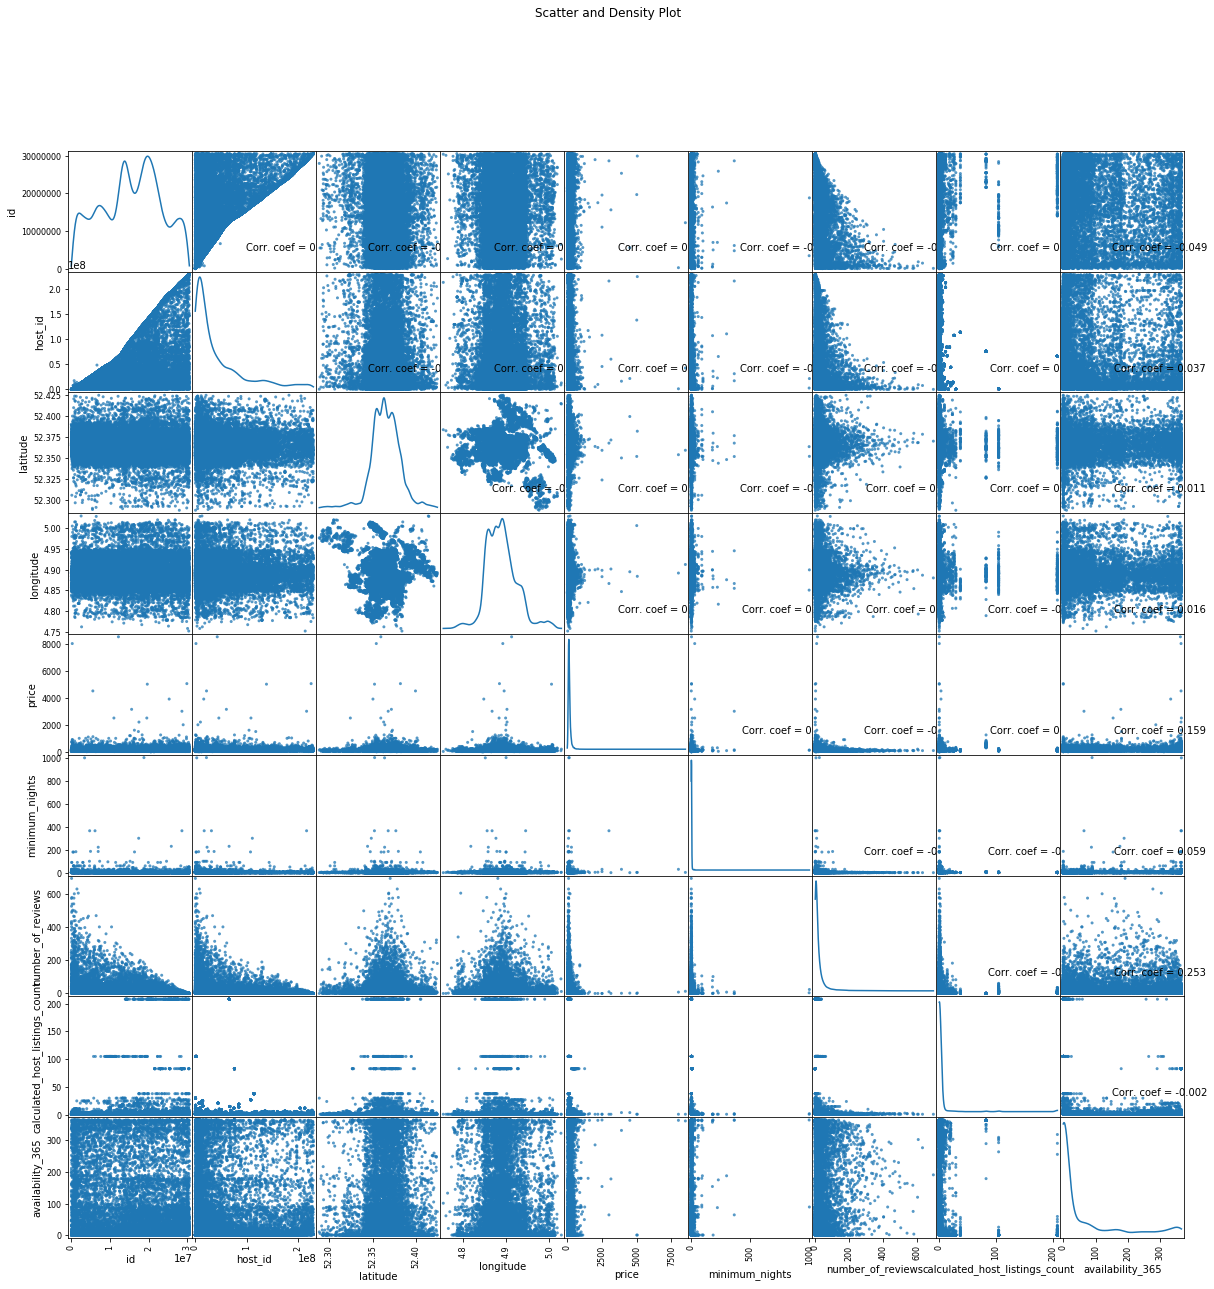

In [13]:
plotScatterMatrix(review, 20, 10)

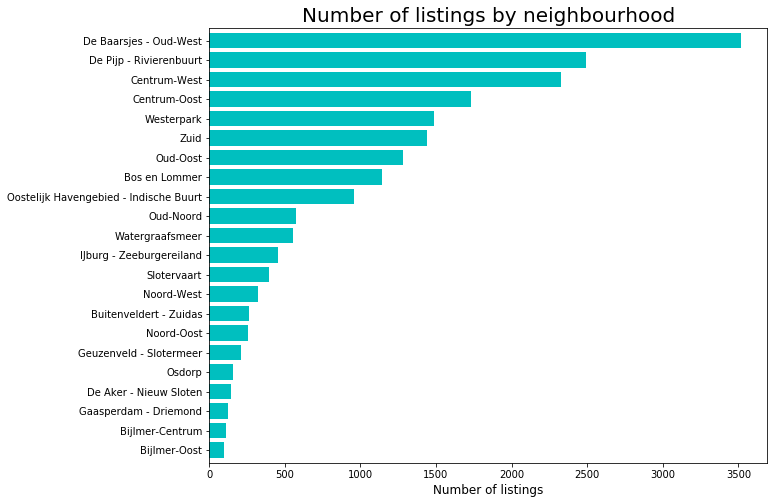

In [30]:
feq=review['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='c', align='center',width=0.8)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [23]:
listing = pd.read_csv("listing.csv", sep=",",encoding='windows-1252')

listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16557956,https://www.airbnb.com/rooms/16557956,2.017110e+13,2017/12/7,Nice Private Room double bed very close to metro,Big enough Private room located one min walk d...,Big enough Private room located one min walk d...,Big enough Private room located one min walk d...,none,"the places is safe for all kinda guests, there...",...,f,NaN,{Amsterdam},f,f,strict,f,f,1,6.42
1,21551351,https://www.airbnb.com/rooms/21551351,2.017110e+13,2017/12/7,Cozy studio-room in Amsterdam,A 1 Studio-Apartament in amsterdam zuidoost. A...,A 1 Studio-Apartament in amsterdam zuidoost. A...,A 1 Studio-Apartament in amsterdam zuidoost. A...,none,Shopping center,...,f,NaN,{Amsterdam},t,f,strict,f,f,2,NaN
2,16219344,https://www.airbnb.com/rooms/16219344,2.017110e+13,2017/12/7,Wonderful double room facing Canal3,"We're a family home, we provide a very clean D...","We're a family home, we provide a very clean D...","We're a family home, we provide a very clean D...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict,f,f,2,7.56
3,21593296,https://www.airbnb.com/rooms/21593296,2.017110e+13,2017/12/7,Cute cosy room in a lovely neighbourhood.,"This is a cute lovely room in a beautiful, qui...","The room is a nice, cosy & comfortable room in...","This is a cute lovely room in a beautiful, qui...",none,The neighbourhood is a beautiful & quiet neigh...,...,f,NaN,{Amsterdam},t,f,flexible,f,f,1,6.18
4,20825413,https://www.airbnb.com/rooms/20825413,2.017110e+13,2017/11/3,Amsterdam thrive retreat,"Private Room available in Amsterdam zuidoost, ...",nature!,"Private Room available in Amsterdam zuidoost, ...",none,neighbourhood is peaceful,...,f,NaN,{Amsterdam},t,f,flexible,f,f,1,4.44


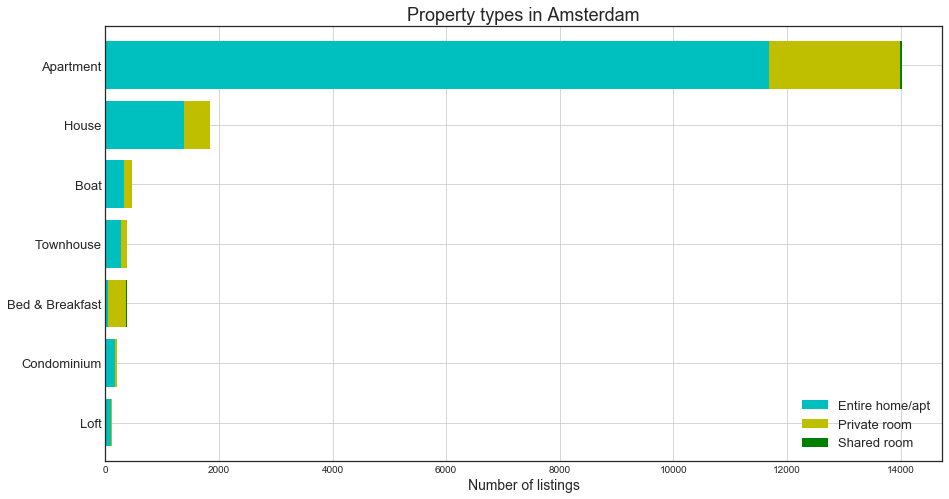

In [50]:
prop = listing.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)

prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop('total',axis=1)
prop.head()
plt.style.use('seaborn-white')
prop.plot(kind='barh',stacked=True, color = ["c","y","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=0.8)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

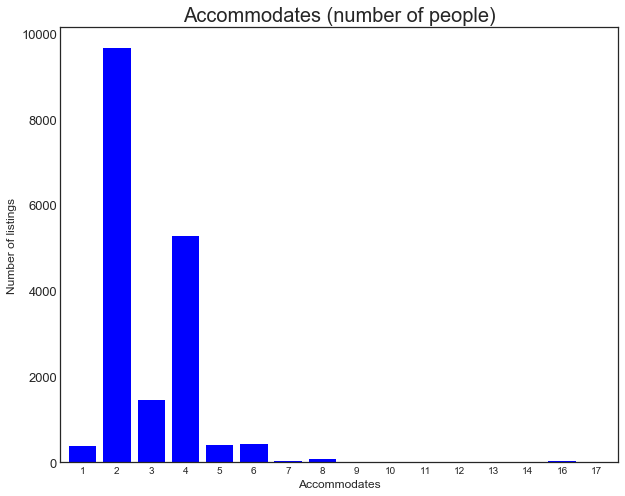

In [51]:
feq=listing['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=0.8, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

C:\Users\Keavy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


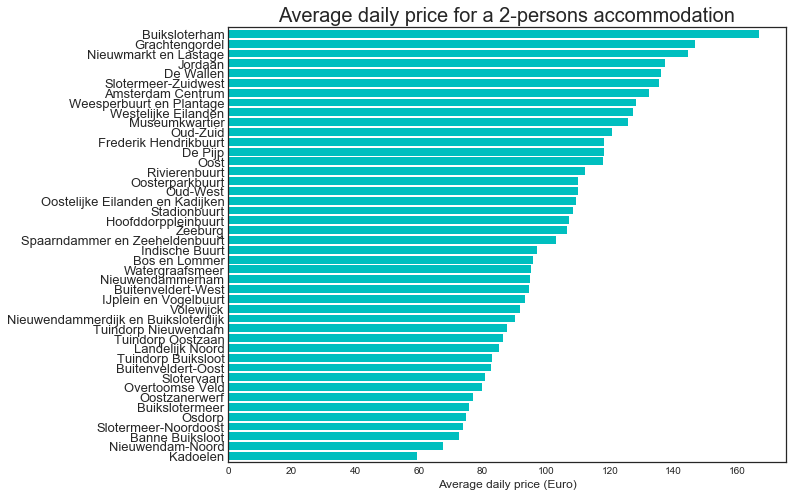

In [60]:
feq = listing[listing['accommodates']==2]
feq['price_new'] = feq['price'].apply(lambda value: float(value.replace(',' , '')[1:]))
feq = feq.groupby('neighbourhood')['price_new'].mean().sort_values(ascending=True)

feq.plot.barh(figsize=(10, 8), color='c', width=0.8)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

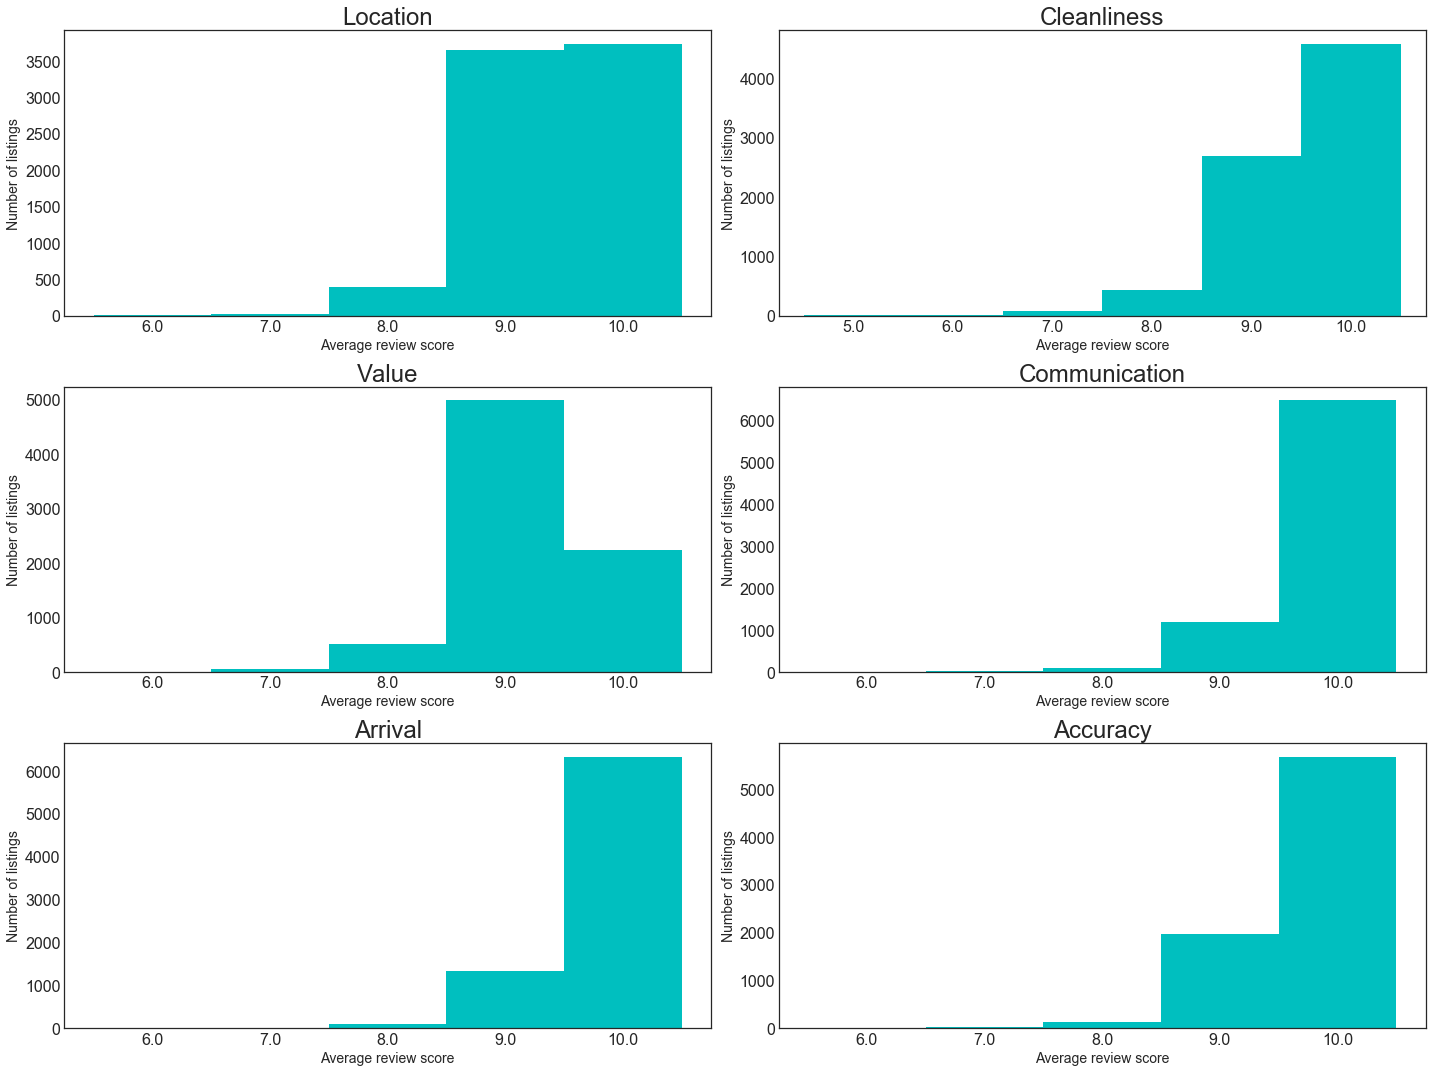

In [63]:
listings10 = listing[listing['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='c', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='c', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='c', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='c', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='c', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='c', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()